### Multiprocessing - test

https://www.kaggle.com/roshansharma/ltfs-loan-default-prediction

In [74]:
import multiprocessing

print("Number of cpu : ", multiprocessing.cpu_count())

Number of cpu :  4


### NOTE: Preprocessing template. 

Why use Pool() and not Process()?

https://towardsdatascience.com/speed-up-your-algorithms-part-3-parallelization-4d95c0888748

In [208]:
# import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [209]:
# Function to crate a figure and get instance of Axis.
def axex(size):
    fig = plt.figure(figsize=(size[0],size[1])) # define plot area
    ax = fig.gca() # define axis  
    return ax

In [390]:
loan_data = pd.read_csv('./Hackathon/Data/train.csv',low_memory=False)
# loan_data = pd.read_csv('../input/train.csv')

In [ ]:
loan_data.describe().T

In [73]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 45 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null datetime64[ns]
Employment.Type                        233154 non-null float64
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag          

In [ ]:
loan_data.head()

In [ ]:
#  Count of unique member id
len(loan_data['UniqueID'].value_counts())

In [ ]:
type(loan_data['Date.of.Birth'][0])

In [ ]:
# loan_data['loan_amnt'].isnull().sum()

# Function to find sum and percent of missing values for each column.
# Remove the one's that have no missing values.

def missing_values(df):
#     Sum null values. Then divide by the total occurrence
    sum = (df == 0).sum() 
    percent = (df == 0).sum()/len(df)*100
    missing_stats = pd.concat([sum, percent], axis=1).rename(
        columns = {
            0: 'Number',
            1: 'Percent'
        }
    )
#   drop all rows that are equal to 0.
    missing_stats = missing_stats[missing_stats.iloc[:,1] != 0]
    missing_stats.reset_index(inplace=True)
    missing_stats.sort_values('Percent', inplace=True)
    
    return missing_stats


In [ ]:
missing_values(loan_data)

In [ ]:
#  Removing columns with more than 70% of missing data.
# Get a threshold of what is 30% 
# print(loan_data.count())

# temp = [i for i in loan_data.count()<887379 *0.30]
# loan_data.drop(loan_data.columns[temp],axis=1,inplace=True)

# EDA

## Loan data vs...

In [ ]:
ax = axex([10,10])

# Average annual income plot
loan_data[['loan_default', 'Current_pincode_ID']].groupby(['Current_pincode_ID']).sum().plot(ax = ax)

## Data distribution

LTV vs distribution
ltv vs amount
LD of salaried and self_employed

In [383]:
def univariate(df,col,vartype,hue =None, fig_size=None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(y=col, x="loan_default",ax=ax[1], data=df,hue=hue)
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        plt.rcParams['figure.figsize'] = (19, 6)
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                if p.get_height() > 0:
                    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_data))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
    plt.xticks(rotation = 45)    
    plt.show()

In [ ]:
temp = pd.Series(data = 'hue')

### Continuous variables

In [395]:
# loan_data = loan_data.drop(loan_data[loan_data['disbursed_amount'] < 30000].index)
loan_data

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,...,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,...,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


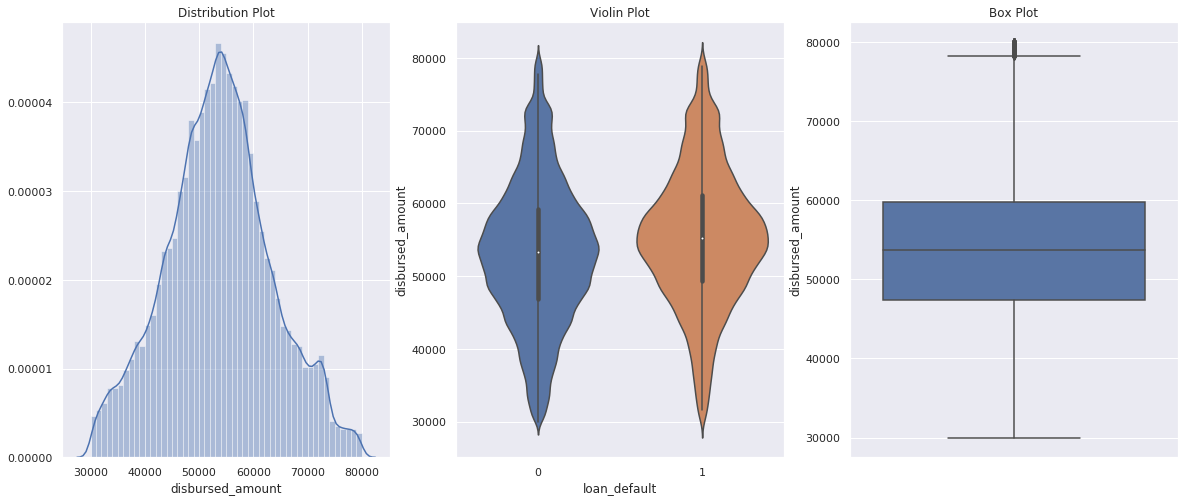

In [394]:
# dibursed_amount
univariate(df=loan_data,col='disbursed_amount',vartype=0)

In [ ]:
# loan_data.loc[(loan_data['disbursed_amount'] > 180000)]['loan_default']

loan_data.disbursed_amount.describe()

In [ ]:
loan_data.loc[(loan_data['disbursed_amount'] > 100000) &\
              (loan_data['loan_default'] == 0)]['loan_default'].count()

__Remove rows containing anomalies (amt > 1lk)? what do these anomalies mean?__

In [ ]:
univariate(df=loan_data,col='asset_cost',vartype=0)

__drop asset_cost > 1lkh?__

In [ ]:
# LTV
univariate(df=loan_data,col='ltv',vartype=0, hue='Employment.Type')

In [ ]:
# Distribution of LTV based on loan_defaults.

fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
ax[0].set_title("ltv non defaulters")
sns.distplot(loan_data[loan_data['loan_default'] == 0]['ltv'], ax=ax[0])
ax[1].set_title("ltv defaulters")
sns.distplot(loan_data[loan_data['loan_default'] == 1]['ltv'], ax=ax[1])


In [ ]:
loan_data.ltv.describe()

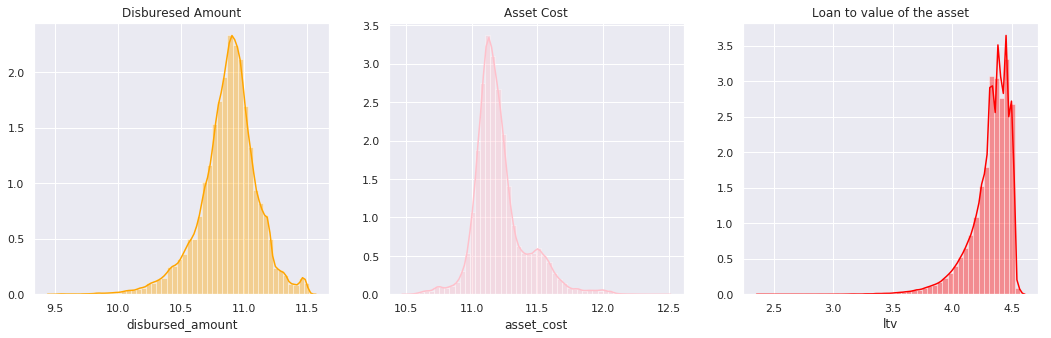

In [387]:
#performing log transformations on disbursed amount, ltv, and asset cost

loan_data['disbursed_amount'] = np.log1p(loan_data['disbursed_amount'])
loan_data['ltv'] = np.log1p(loan_data['ltv'])
loan_data['asset_cost'] = np.log1p(loan_data['asset_cost'])

# univariate(df=loan_data,col='disbursed_amount',vartype=0)
# univariate(df=loan_data,col='asset_cost',vartype=0)
# univariate(df=loan_data,col='ltv',vartype=0)
plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(loan_data['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(loan_data['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(loan_data['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

In [ ]:
len(loan_data.loc[(loan_data['ltv'] < 40) & (loan_data['loan_default'] == 1)])

# Lower the ltv == more money with self.

In [ ]:
# distribution of cns score
univariate(df=loan_data,col='PERFORM_CNS.SCORE',vartype=0)

In [ ]:
loan_data['PERFORM_CNS.SCORE'].describe()

In [ ]:
# Default and no credit rating score
x = len(loan_data.loc[(loan_data['PERFORM_CNS.SCORE'] == 0) &\
              (loan_data['loan_default'] == 1)])

y = len(loan_data.loc[(loan_data['PERFORM_CNS.SCORE'] == 0)])

# percent defaulted with no CNS score.
print(x/y)

In [ ]:
len(loan_data[(loan_data['loan_default'] == 1) & (loan_data['PRIMARY.INSTAL.AMT'] > 0)])
print(len(loan_data[(loan_data['PRIMARY.INSTAL.AMT'] > 0)]))

In [ ]:
# distribution of EMI amount
# univariate(df=loan_data,col='PRIMARY.INSTAL.AMT',vartype=0)
ax = axex([10,10])
loan_data['PRIMARY.INSTAL.AMT'].plot.hist(ax=ax)

### Categorical Variables

In [ ]:
len(loan_data)

In [ ]:
print(loan_data['loan_default'].value_counts())
print(50611/182543)

In [ ]:
# Employment type count plot
univariate(df=loan_data,col='Employment.Type',vartype=1)


In [ ]:
univariate(df=loan_data[(loan_data['Employment.Type'] == 'Salaried')],col='loan_default',vartype=1)

In [ ]:
19910/77948

In [ ]:
univariate(df=loan_data[(loan_data['Employment.Type'] == 'Self employed')],col='loan_default',vartype=1)

In [ ]:
29057/98578

In [ ]:
# Count of loan applicant from each state
univariate(df=loan_data,col='State_ID',vartype=1)

In [ ]:
# LD vs Sate
univariate(df=loan_data,col='State_ID',vartype=1, hue='loan_default')


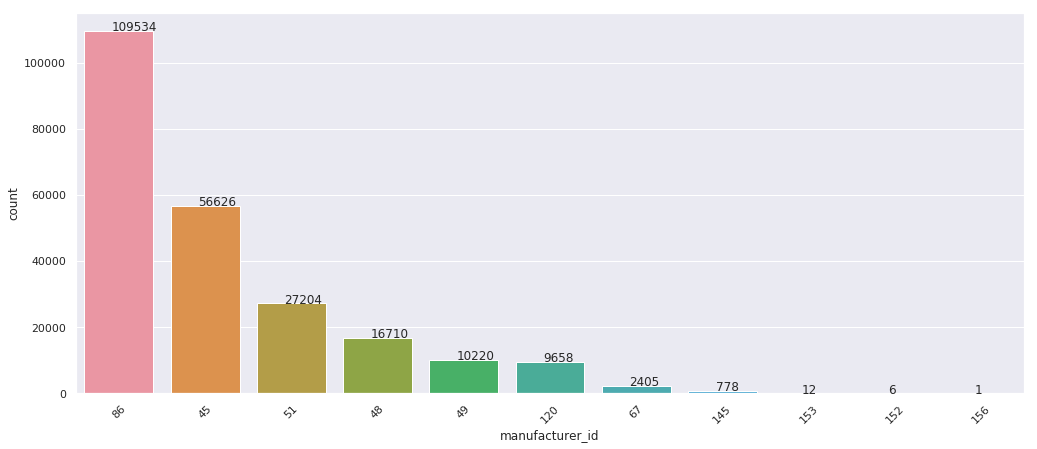

In [353]:
# Count of instances per manufacturer
univariate(df=loan_data,col='manufacturer_id',vartype=1)

In [354]:
len(loan_data.loc[(loan_data['manufacturer_id'] == 152) |\
              (loan_data['manufacturer_id'] == 153) |\
              (loan_data['manufacturer_id'] == 156)
             ])

19

Drop manu_id 152, 153, 156 ? total == 19 

In [ ]:
loan_data['manufacturer_id'].value_counts().index

In [ ]:
loan_data.loc[(loan_data['manufacturer_id'] == 153) & (loan_data['loan_default']==1)]['loan_default']


In [ ]:
univariate(df=loan_data,col='manufacturer_id',vartype=1)

In [ ]:
# LD vs manufacturer

'''
    152 and 156 have no defaults. p.get_height() is returning a nan value if value = 0.
    153 has 4 loan_defaults. percentage base is entire df len. therefore 0% for 153 comes 
    after flooring the percent value.
    '''
univariate(df=loan_data,col='manufacturer_id',vartype=1, hue='loan_default')


In [ ]:
# # Count of instances per branch_id
# univariate(df=loan_data,col='branch_id',vartype=1)

# LD grouped by branchid. 

ax = axex([15,10])

loan_data[['loan_default', 'branch_id']].\
    groupby('branch_id').\
    count().\
    plot.bar(ax=ax)


ax.set_title('LD vs Branch')
ax.set_xlabel('Branch')
ax.set_ylabel('LD')

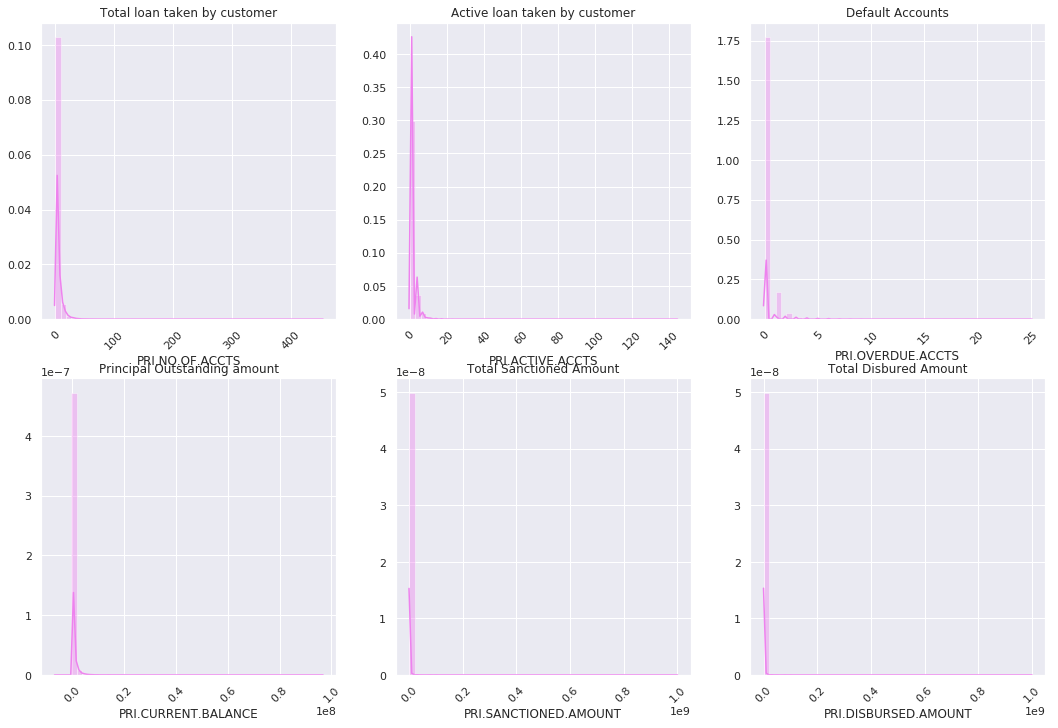

In [397]:
plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(loan_data['PRI.NO.OF.ACCTS'], color = 'violet')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(loan_data['PRI.ACTIVE.ACCTS'], color = 'violet')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(loan_data['PRI.OVERDUE.ACCTS'], color = 'violet')
plt.title('Default Accounts')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(loan_data['PRI.CURRENT.BALANCE'], color = 'violet')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(loan_data['PRI.SANCTIONED.AMOUNT'], color = 'violet')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(loan_data['PRI.DISBURSED.AMOUNT'], color = 'violet')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20 ,20)
ax = sns.countplot(data = loan_data, x= 'branch_id', order=loan_data['branch_id'].\
                   value_counts().index,hue = 'loan_default')
for p in ax.patches:
#     
    if p.get_height() > 0:
        ax.annotate('{:1.1f}'.format((p.get_height())),\
                    (p.get_x()+0.05, p.get_height()+20))

__Additional plots__

In [ ]:

# fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(30,8))
# ax[0].set_title('Credit History')
# sns.countplot(loan_data['CREDIT.HISTORY.LENGTH'].head(50))
# plt.xticks(rotation = 45)

# ax[1].set_title('Average Loan Tenure')
# sns.countplot(loan_data['AVERAGE.ACCT.AGE'].head(50), palette = 'colorblind')
# plt.xticks(rotation = 45)

# # plotting countplot for credit history of users

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(loan_data['CREDIT.HISTORY.LENGTH'].head(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

# univariate(df=loan_data.head(50),col='CREDIT.HISTORY.LENGTH',vartype=1)

In [ ]:
# average.acct.age i.e., average loan tenure

sns.countplot(loan_data['AVERAGE.ACCT.AGE'].head(50), palette = 'colorblind')
plt.title('Average Loan Tenure')
plt.xticks(rotation = 45)

__Convert credit.history.length to number of months__ 
Should we convert to years??

In [ ]:
# change_to_months(loan_data)

# plt.rcParams['figure.figsize'] = (18, 5)
# sns.countplot(loan_data['cred_hist_len'].head(50))
# plt.title('Credit History')
# plt.xticks(rotation = 45)


In [ ]:
# average.acct.age i.e., average loan tenure

# sns.countplot(loan_data['avg_tenure'].head(50), palette = 'colorblind')
# plt.title('Average Loan Tenure')
# plt.xticks(rotation = 45)

In [ ]:
# checking the bureau score description

plt.rcParams['figure.figsize'] = (19, 6)
sns.countplot(loan_data['PERFORM_CNS.SCORE.DESCRIPTION'], palette = 'pastel')
plt.title('Bureau Score Description', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()


In [ ]:
# loans defaulted in last six months

loan_data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

In [ ]:
univariate(df=loan_data,col='DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',vartype=1)

In [ ]:
univariate(df=loan_data,col='NEW.ACCTS.IN.LAST.SIX.MONTHS',vartype=1)

In [ ]:
# checking the bureau score

# plt.rcParams['figure.figsize'] = (15, 5)
# plt.subplot(1, 2, 1)
# sns.distplot(loan_data['PERFORM_CNS.SCORE'], color = 'purple')
# plt.title('Before Log transformations')

# plt.subplot(1, 2, 2)
# loan_data['PERFORM_CNS.SCORE_log'] = np.log1p(loan_data['PERFORM_CNS.SCORE'])
# sns.distplot(loan_data['PERFORM_CNS.SCORE_log'], color = 'maroon')
# plt.title('After Log transformations')

# plt.show()

## Bivariate plots 
__relation of 2 features to the target(categorical type)__ Used to check correlation of the features.

In [ ]:
# sns.relplot(x="asset_cost", y="disbursed_amount", hue="loan_default", data=loan_data)

__Probably confirms removing val > 1lkh based on disbursed_amount and asset_cost distribution__

In [ ]:
# sns.catplot(x="loan_default", y="disbursed_amount", data=loan_data)

In [ ]:
plt.rcParams['figure.figsize'] = (19, 6)
sns.relplot(data =loan_data, x='PRIMARY.INSTAL.AMT', y='disbursed_amount', hue ='loan_default')
plt.title('EMI vs Disbursed Amount')
plt.show()

# Feature Engineering


1. Convert PERFORM_CNS.SCORE.DESCRIPTION to buckets (1 == risk, 0 == no data)
2. DisbursalDate to DisbursalMonth??
3. Make buckets for branch_id, manufacturer_id, state_id

### Bucket categorical var

In [260]:
def bucket(df, col, bin_size):
    avg = df[[col, 'PERFORM_CNS.SCORE']].groupby(by=col, as_index=False).mean()
    col_name = '{}_bucket'.format(col)
    col_name_series = df[col].apply(lambda x: avg.loc[avg[col] == x, 'PERFORM_CNS.SCORE'].values[0])
    print(col_name)
    df[col_name] = pd.qcut(x=col_name_series.values.reshape(len(col_name_series)), q=bin_size, labels=False)

### Changing duration to number of months

In [261]:
loan_data['AVERAGE.ACCT.AGE'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     0yrs 8mon
4     0yrs 0mon
Name: AVERAGE.ACCT.AGE, dtype: object

In [262]:
import re

def pat1(x):
    result = re.search('([0-9]*) [0-9]*', x)
    return int(result.group(1))

def pat2(x):
    result = re.search('[0-9]* ([0-9]*)', x)
    return int(result.group(1))
    
def change_to_months(loan_data):
    loan_data['avg_tenure'] = loan_data['AVERAGE.ACCT.AGE'].str.replace(r'[a-zA-Z]*', '')
    loan_data['cred_hist_len'] = loan_data['CREDIT.HISTORY.LENGTH'].str.replace(r'[a-zA-Z]*', '')
    loan_data['avg_tenure'] = loan_data['avg_tenure'].apply(lambda x: pat1(x)*12 + pat2(x))
    loan_data['cred_hist_len'] = loan_data['cred_hist_len'].apply(lambda x: pat1(x)*12 + pat2(x))
    


### Create age from DOB

In [263]:
def change_to_age(loan_data):
    now = pd.Timestamp('now')
    loan_data['Date.of.Birth'] = pd.to_datetime(loan_data['Date.of.Birth'])
    loan_data['Date.of.Birth'] = loan_data['Date.of.Birth'].where(loan_data['Date.of.Birth'] < now, loan_data['Date.of.Birth'] -  np.timedelta64(100, 'Y'))
    loan_data['age'] = (now - loan_data['Date.of.Birth']).astype('<m8[Y]')

### Convert employment type to numerical format

In [264]:
def change_to_binary(loan_data):
    # 1 - Salaried
    # 0 - Self-employed
    loan_data['Employment.Type'] = loan_data['Employment.Type'].map({'Salaried': 1, 'Self employed' : 0}, na_action='ignore')
    loan_data['Employment.Type'].fillna(-1, inplace = True)

 ### Add na as unemployed

In [265]:
def Na_unemplyed(loan_data):
    loan_data['Employment.Type'].fillna('Unemployed', inplace = True)

### Converting all flags to one feature

In [266]:
def create_traceability(loan_data):
    loan_data['traceability'] = (loan_data['MobileNo_Avl_Flag'] + loan_data['Aadhar_flag'] + loan_data['PAN_flag'] + loan_data['VoterID_flag'] + loan_data['Driving_flag'] + loan_data['Passport_flag']) / 6.0

Should the flags be dropped? Test with model

### Dropping entries of asset_cost > 100000

In [356]:
def drop_outliers(df):
    df = df.drop(df.loc[(df['disbursed_amount'] > 80000) & ((df['disbursed_amount'] < 30000))].index)
    df = df.drop(df.loc[(df['manufacturer_id'] == 152) &\
                   (df['manufacturer_id'] == 153) &\
                   (df['manufacturer_id'] == 156)].index)    

### Creating diff of sanctioned and disbursed amount

In [ ]:
def create_amt_paid(df):
    df['amt_paid'] = df['PRI.CURRENT.BALANCE'] - df['PRI.DISBURSED.AMOUNT']

### Logging values that are skewed

In [ ]:
def log_features(df):
#     df['disbursed_amount'] = np.log1p(df['disbursed_amount'])
#     df['ltv'] = np.log1p(df['ltv'])
    df['PERFORM_CNS.SCORE'] = np.log1p(df['PERFORM_CNS.SCORE'])
    df['PRI.NO.OF.ACCTS'] = np.log1p(df['PRI.NO.OF.ACCTS'])
    df['PRI.ACTIVE.ACCTS'] = np.log1p(df['PRI.ACTIVE.ACCTS'])
    df['PRI.OVERDUE.ACCTS'] = np.log1p(df['PRI.OVERDUE.ACCTS'])

### Converting credit rating desc to categorical values 

In [398]:
def convert_cred_desc(data):
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', -1)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', -1)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', -1)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',-1)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', -1)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', -1)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found', -1)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 5)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 5)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 4)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 4)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 2)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 2)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 2)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 1)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 1)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 1)
    data['PERFORM_CNS.SCORE.DESCRIPTION'] = data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 1)


### Call functions on datasets

In [359]:
test = pd.read_csv('./Hackathon/Data/test.csv')
df_model_buf = loan_data.copy(deep=True)
df_test_model_buf = test.copy(deep=True)


In [360]:
df_arr = [df_model_buf, df_test_model_buf]
for df in df_arr:
    change_to_months(df)
    change_to_age(df)
    change_to_binary(df)
    create_traceability(df)
    drop_outliers(df)
    # bucket(df_model, 'State_ID', 5)
    bucket(df, 'Current_pincode_ID', 5)
    bucket(df, 'branch_id', 5)
    log_features(df)
    convert_cred_desc(df)
    create_amt_paid(df)

Current_pincode_ID_bucket
branch_id_bucket
Current_pincode_ID_bucket
branch_id_bucket


In [ ]:
df_model = df_model_buf.copy(deep=True)
df_test_model = df_test_model_buf.copy(deep=True)


# Model fitting

In [361]:
df_arr = [df_model, df_test_model]
for df in df_arr:
    df.drop([
        'UniqueID',
        'branch_id',
        'supplier_id',
        'Current_pincode_ID',
        'VoterID_flag',
        'Aadhar_flag',
        'MobileNo_Avl_Flag',
        'PAN_flag',
        'VoterID_flag',
        'Driving_flag',
        'Passport_flag',
        'SEC.NO.OF.ACCTS',
        'SEC.ACTIVE.ACCTS',
        'SEC.OVERDUE.ACCTS',
        'SEC.CURRENT.BALANCE',
        'SEC.SANCTIONED.AMOUNT',
        'SEC.DISBURSED.AMOUNT',
        'SEC.INSTAL.AMT',
        'Date.of.Birth',
        'AVERAGE.ACCT.AGE',
        'PRI.CURRENT.BALANCE',
        'PRI.DISBURSED.AMOUNT',
        'PRI.SANCTIONED.AMOUNT', #Dropping because it has 1 correlation with disbursed amount
        'CREDIT.HISTORY.LENGTH',
        'Employee_code_ID',
        'State_ID',
        'DisbursalDate',
    ], axis=1, inplace=True)
    


## Feature Selection

In [ ]:
#no of features
nof_list=np.arange(1,len(list(df_model)))            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

### Correlation Map

In [362]:
loan_correlation = df_model.corr()

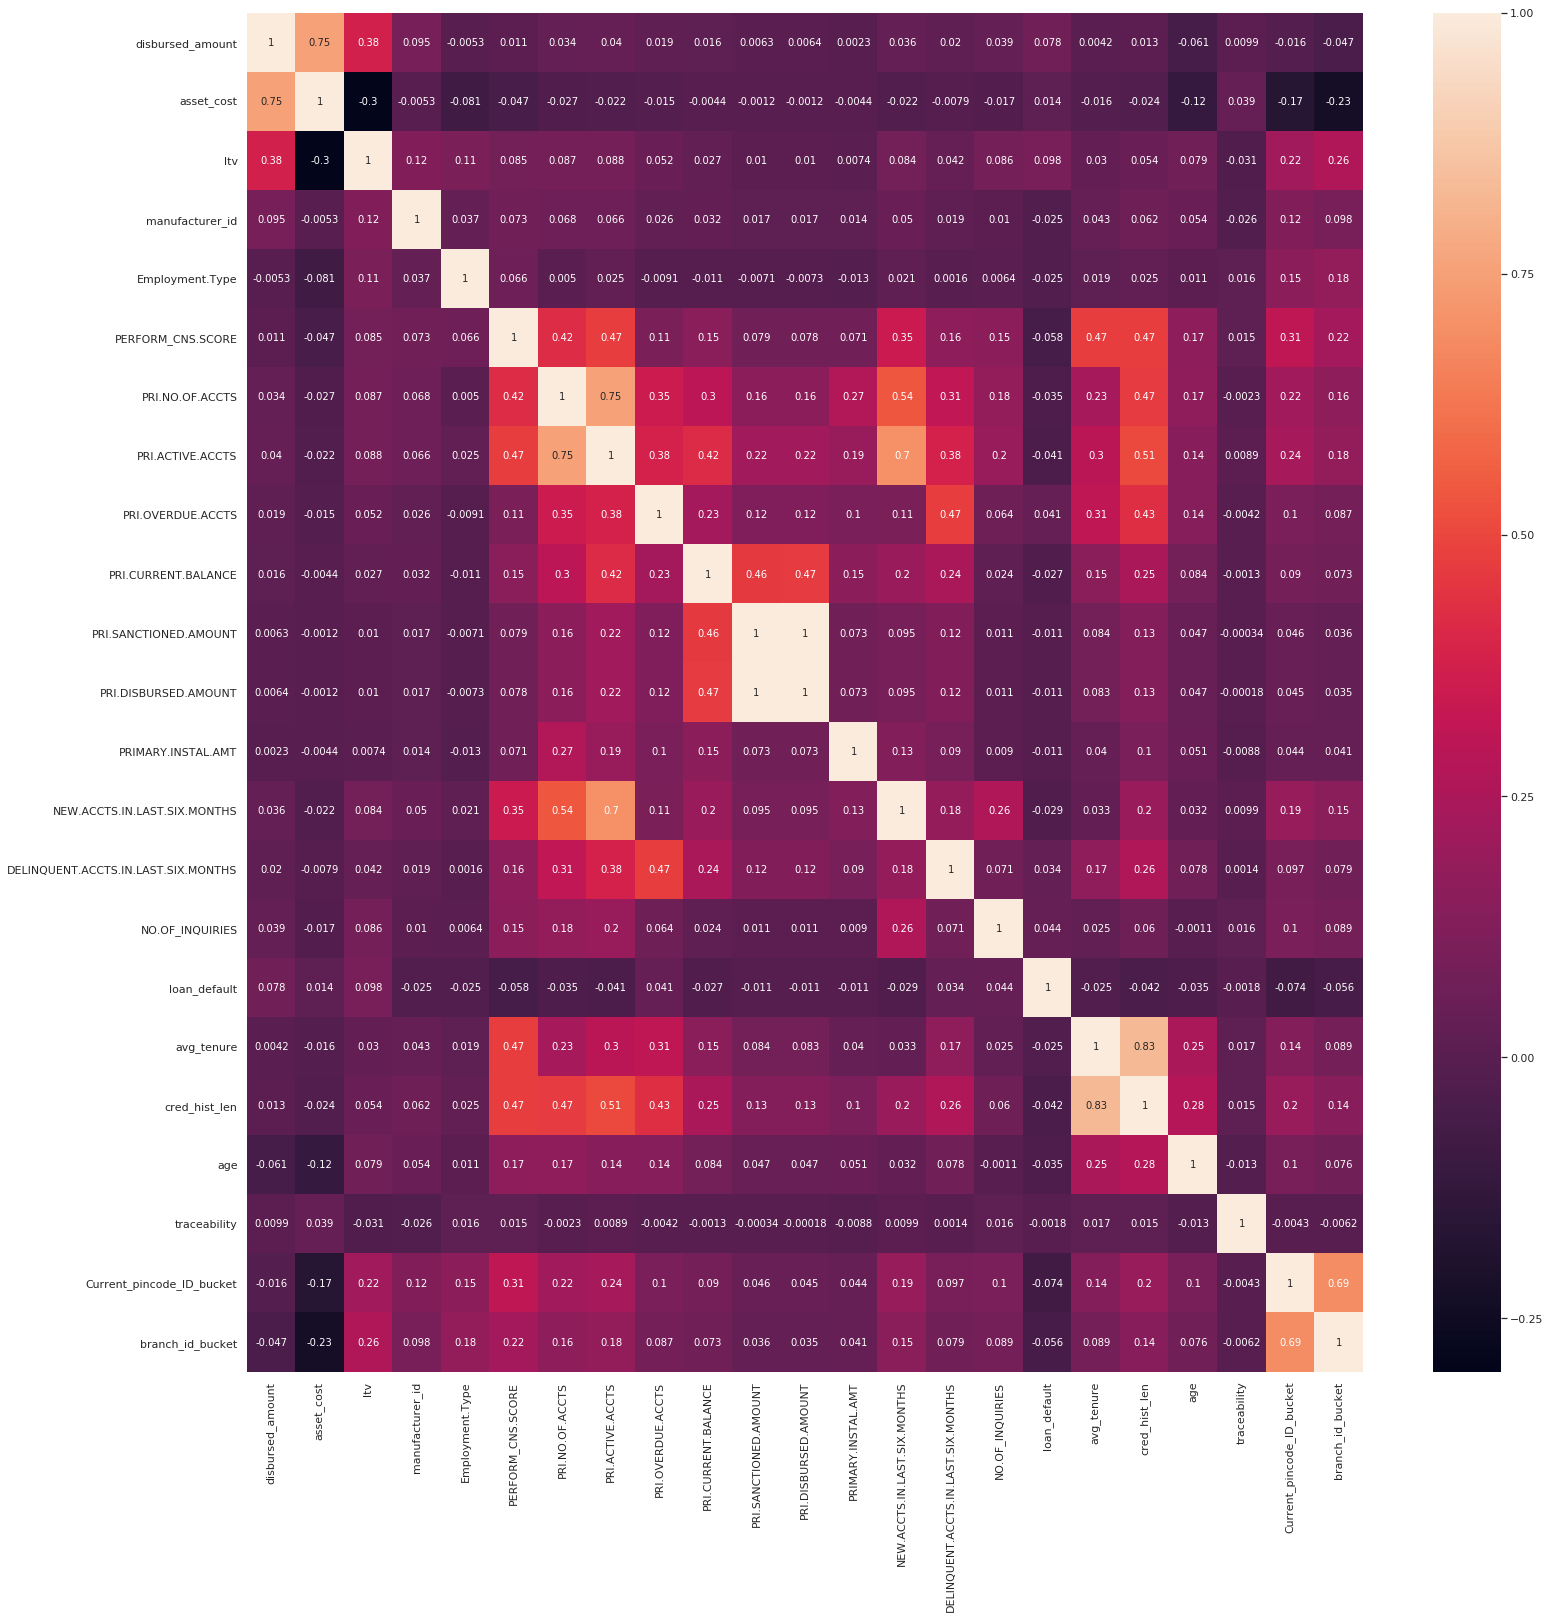

In [363]:
%matplotlib inline
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

### One hot encode the df copies

In [364]:
df_model[['manufacturer_id', 'Current_pincode_ID_bucket', 'branch_id_bucket']] = df_model[['manufacturer_id', 'Current_pincode_ID_bucket', 'branch_id_bucket']].astype('category')
df_test_model[['manufacturer_id', 'Current_pincode_ID_bucket', 'branch_id_bucket']] = df_test_model[['manufacturer_id', 'Current_pincode_ID_bucket', 'branch_id_bucket']].astype('category')

df_model = pd.get_dummies(data=df_model, columns=['Current_pincode_ID_bucket', 'branch_id_bucket', 'manufacturer_id'])
df_test_model = pd.get_dummies(data=df_test_model, columns=['Current_pincode_ID_bucket', 'branch_id_bucket', 'manufacturer_id'])

In [346]:
# df[['manufacturer_id', 'Current_pincode_ID_bucket', 'branch_id_bucket']].info()

In [365]:
df_model.rename(index=str, columns={"loan_default": "Target"}, inplace=True)
df_model.shape
df_model.head().T

,0,1,2,3,4
disbursed_amount,50578.000000,47145.000000,53278.000000,57513.000000,52378.000000
asset_cost,58400.000000,65550.000000,61360.000000,66113.000000,60300.000000
ltv,89.550000,73.230000,89.630000,88.480000,88.390000
Employment.Type,1.000000,0.000000,0.000000,0.000000,0.000000
PERFORM_CNS.SCORE,0.000000,598.000000,0.000000,305.000000,0.000000
PRI.NO.OF.ACCTS,0.000000,1.000000,0.000000,3.000000,0.000000
PRI.ACTIVE.ACCTS,0.000000,1.000000,0.000000,0.000000,0.000000
PRI.OVERDUE.ACCTS,0.000000,1.000000,0.000000,0.000000,0.000000
PRI.CURRENT.BALANCE,0.000000,27600.000000,0.000000,0.000000,0.000000
PRI.SANCTIONED.AMOUNT,0.000000,50200.000000,0.000000,0.000000,0.000000


### Balancing - Smote 

In [366]:
# applying SMOTE

from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_sample(df_model.drop('Target',axis=1),df_model['Target'].values.ravel()) 

# checking the shape of x_resample and y_resample
print("Shape of x:", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x: (365086, 40)
Shape of y: (365086,)


### Splitting the dataset

In [367]:
# train and valid sets from train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, stratify=y_resample, random_state = 0)
# X_train, X_test, y_train, y_test = train_test_split(df_model.drop('Target',axis=1),df_model['Target'],test_size=0.20, stratify=df_model['Target'], random_state=0)
# checking the shapes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print('test_set', df_test_model.shape)

(292068, 40)
(292068,)
(73018, 40)
(73018,)
test_set (112392, 40)


### Balancing the training dataset as 50-50

In [315]:
# np_y_train = y_train.values
# np_X_train = X_train.values
# total_num_of_ones = int(np.sum(y_train))
# # print(total_num_of_ones)
# zero_counter = 0
# indices_to_remove = []

# for i in range(np_y_train.shape[0]):
#     if np_y_train[i] == 0:
#         if zero_counter < total_num_of_ones:
#             zero_counter += 1
#         else:
#             indices_to_remove.append(i)

# X_train = np.delete(np_X_train, indices_to_remove, axis=0)
# y_train = np.delete(np_y_train, indices_to_remove, axis=0)

In [368]:
# applying standardization

# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_set = sc.transform(df_test_model)

/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [369]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier

In [370]:
def skf(model, X_train, y_train):
    x_index = [x for x in range(len(X_train))]
    y_index = [x for x in range(len(y_train))]

    X_train_m = pd.DataFrame(data=X_train, index=x_index)
    y_train_m = pd.DataFrame(data=y_train, index=y_index)

    i = 1
    kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    for train_index,test_index in kf.split(X_train_m,y_train_m):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtr,xvl = X_train_m.loc[train_index], X_train_m.loc[test_index]
        ytr,yvl = y_train_m.loc[train_index], y_train_m.loc[test_index]
        model.fit(xtr, ytr)
        pred=model.predict(xvl)
        print('accuracy_score',accuracy_score(yvl,pred))
        i+=1

In [371]:
def run_models(model):
    skf(model, X_train, y_train)

    y_pred = model.predict(X_test)

    print("Training Accuracy: {}".format(model.__class__), model.score(X_train, y_train))
    print('Testing Accuarcy: {}'.format(model.__class__), model.score(X_test, y_test))

    # making a classification report
    cr = classification_report(y_test,  y_pred)
    print(cr)

    # making a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True)
    
    apc = average_precision_score(y_test, y_pred)
    print('Average Precision Score {}:'.format(model.__class__), apc)
    return model
    
#     print("Predicting for {}".format(model.__class__))
#     y_pred = model.predict(test_set)
#     print(pd.Series(y_pred_rf).value_counts())

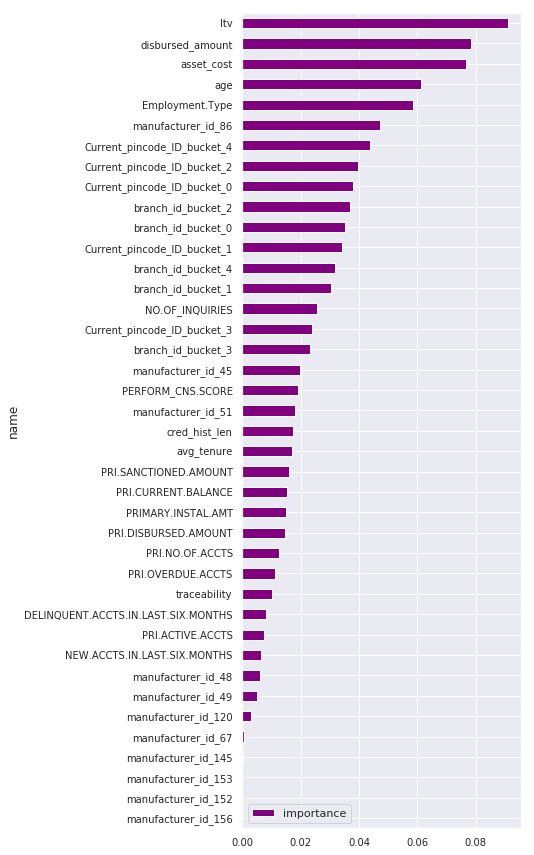

In [373]:
# let's plot the feature importance plot for the lg boost model

feature = pd.DataFrame()
x_train = pd.DataFrame(X_train)

feature['name'] = df_model.drop('Target',axis=1).columns
feature['importance'] = model.feature_importances_

feature.sort_values(by = ['importance'], ascending = True, inplace = True)
feature.set_index('name', inplace = True)

feature.plot(kind = 'barh', color = 'purple', figsize = (5, 15), fontsize = 10)

# Predict on test dataset

In [374]:
# let's predict for the tests set


# y_pred_ada = model_ada.predict(test_set)
# y_pred_xgb = model_xgb.predict(test_set)
y_pred = model.predict(test_set)

In [375]:
# print(pd.Series(y_pred_rf).value_counts())
# print(pd.Series(y_pred_ada).value_counts())
# print(pd.Series(y_pred_xgb).value_counts())
print(pd.Series(y_pred).value_counts())

0    105225
1      7167
dtype: int64


### Submission file

In [376]:
#  let's create a submission file

#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'UniqueID': test['UniqueID'],'loan_default': y_pred})

#Visualize the first 5 rows
submission.head()

,UniqueID,loan_default
0,655269,0
1,723482,0
2,758529,1
3,763449,0
4,708663,0


In [377]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = './submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: ./submission.csv



1 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuracy_score 0.8475417693782525

2 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuracy_score 0.844426184606957

3 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuracy_score 0.844391947411668

4 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuracy_score 0.838982470556012

5 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuracy_score 0.8479079641169622

6 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuracy_score 0.8446552078340067

7 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuracy_score 0.8462302266657536

8 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuracy_score 0.8508525645415326

9 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuracy_score 0.8460247894268301

10 of kfold 10


/home/ajinkya/.virtualenvs/ml/lib/python3.5/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuracy_score 0.8457508731082655
Training Accuracy: <class 'sklearn.ensemble.forest.RandomForestClassifier'> 0.9708937644658093
Testing Accuarcy: <class 'sklearn.ensemble.forest.RandomForestClassifier'> 0.8464488208386973
              precision    recall  f1-score   support

           0       0.79      0.95      0.86     36509
           1       0.93      0.75      0.83     36509

   micro avg       0.85      0.85      0.85     73018
   macro avg       0.86      0.85      0.84     73018
weighted avg       0.86      0.85      0.84     73018

Average Precision Score <class 'sklearn.ensemble.forest.RandomForestClassifier'>: 0.8227775966716357


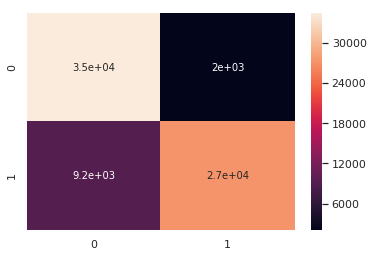

In [372]:
model = run_models(RandomForestClassifier())
# from multiprocessing import Pool

# #Add imported classes of classification models to be used.
# # RandomForestClassifier(), AdaBoostClassifier(), LGBMClassifier()
# regressors_list = [LGBMClassifier()] 
# pool = Pool(4)
# pool.map(run_models,regressors_list)
# pool.close()
# pool.join()